In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats.mstats import winsorize
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor

In [2]:
train = pd.read_csv("D:/Rifaldi Raja/Robust Reg/train.csv")
test = pd.read_csv("D:/Rifaldi Raja/Robust Reg/test.csv")

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


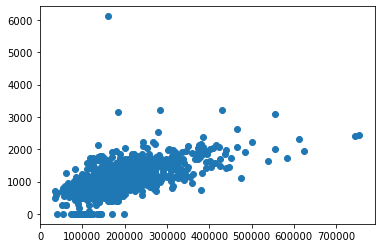

In [4]:
plt.scatter(train["SalePrice"], train["TotalBsmtSF"])
plt.show()

In [5]:
variables = ["OverallQual", "MSSubClass","TotalBsmtSF","GrLivArea","SalePrice"]

In [6]:
train = train[variables]
Id = test["Id"]
test = test[["OverallQual", "MSSubClass","TotalBsmtSF","GrLivArea"]]

In [7]:
test.isna().sum()

OverallQual    0
MSSubClass     0
TotalBsmtSF    1
GrLivArea      0
dtype: int64

In [8]:
test.fillna(0, inplace=True)

In [9]:
y = train["SalePrice"]
x = train.drop(["SalePrice"], axis = 1)

In [10]:
lr = LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.7486440315518351

In [11]:
rf = RandomForestRegressor()
rf.fit(x,y)
rf.score(x,y)

0.9714907714420666

In [12]:
hr = HuberRegressor()
hr.fit(x,y)
hr.score(x,y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7438567255833776

In [13]:
rr = RANSACRegressor()
rr.fit(x,y)
rr.score(x,y)

0.7214763689085215

In [14]:
tr = TheilSenRegressor()
tr.fit(x,y)
tr.score(x,y)

0.7351518574766013

In [17]:
from sklearn.metrics import mean_absolute_error

In [22]:
y_pred = lr.predict(x)

In [19]:
mape_lr = mean_absolute_percentage_error(y, y_pred)

In [20]:
mape_lr

0.1600137530422633

In [23]:
y_pred_rf = rf.predict(x)

In [24]:
mape_rf = mean_absolute_percentage_error(y,y_pred_rf)

In [25]:
mape_rf

0.05261473471367546

In [26]:
y_pred_hr = hr.predict(x)

In [27]:
mape_hr = mean_absolute_percentage_error(y,y_pred_hr)

In [28]:
mape_hr

0.15359001240078973

In [29]:
y_pred_rr = rr.predict(x)
mape_rr = mean_absolute_percentage_error(y,y_pred_rr)
mape_rr

0.15935986246219933

In [30]:
y_pred_tr = tr.predict(x)
mape_tr = mean_absolute_percentage_error(y,y_pred_tr)
mape_tr

0.1578651660163951